# Imports  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import  Bar, Layout, Figure
from plotly import __version__
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Iterable, Set
import sys
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))


% matplotlib inline

sys.path.append('/home/laugustyniak/github/phd/sentiment-backend/')

from aspects.analysis import statistics_dataset
from aspects.analysis import nlp_architect

init_notebook_mode(connected=True)

In [3]:
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
scmamp = importr('scmamp')

In [4]:
results_path = Path('/home/laugustyniak/luk.augustyniak@gmail.com/Projects/PRELUDIUM/Artykuły/aspect-based sentiment 2018/')

In [22]:
dataset_sub_name = 'restaurants'
# dataset_sub_name = 'laptops'

In [23]:
EMBEDDINGS_SUBSET = ['fastText', 'Amazon Reviews', 'numberbatch', 'Glove 840B', 'word2vec']

In [24]:
embedding_names = {
    'wiki-news-300d-1M': 'fastText-2', 
    'glove.42B.300d': 'Glove 42B', 
    'crawl-300d-2M': 'fastText', 
    'sentic2vec': 'Amazon Reviews',
    'glove.6B.100d': 'Glove 6B 100', 
    'numberbatch-en': 'numberbatch', 
    'glove.6B.50d': 'Glove 6B 50', 
    'glove.840B.300d': 'Glove 840B',
    'glove.6B.200d': 'Glove 6B 200', 
    'glove.6B.300d': 'Glove 6B 300', 
    'GoogleNews-vectors-negative300': 'word2vec'
}

method_names = {
    'word lstm': 'Wo-LSTM',
    'word lstm crf': 'Wo-LSTM-CRF',
    'char word lstm': 'WoCh-LSTM',
    'char word lstm crf': 'WoCh-LSTM-CRF',
    'word bilstm': 'Wo-BiLSTM',
    'word bilstm crf': 'Wo-BiLSTM-CRF',
    'char word bilstm': 'WoCh-BiLSTM',
    'char word bilstm crf': 'WoCh-BiLSTM-CRF',
}

# Get all results in one Data Frame

In [25]:
nlp_architect.get_models_f1_metric(
        Path(
            f'../../../nlp-architect/examples/aspect_extraction/models-oxygen-1/models'
        ), dataset_sub_name, embedding_names)

,fastText-2,Glove 42B,fastText,Amazon Reviews,Glove 6B 100,numberbatch,Glove 6B 50,Glove 840B,Glove 6B 200,Glove 6B 300,word2vec
Wo-LSTM,77.00,81.26,80.77,47.89,76.66,75.84,67.57,81.23,79.29,78.78,76.99
WoCh-LSTM,77.09,81.91,80.02,65.50,77.32,77.26,74.45,80.61,78.24,78.36,78.14
Wo-LSTM-CRF,83.21,84.51,84.28,52.23,80.83,79.72,74.84,83.86,82.61,80.43,82.06
WoCh-LSTM-CRF,84.39,83.92,84.91,71.10,81.37,81.91,77.84,83.56,82.49,81.04,83.05
Wo-BiLSTM,76.88,82.06,82.86,49.10,80.67,78.48,76.06,82.85,80.84,81.30,79.66
WoCh-BiLSTM,80.12,82.51,82.09,69.70,80.94,79.96,78.03,82.69,80.09,81.29,80.55
Wo-BiLSTM-CRF,82.82,82.82,84.25,50.03,82.89,81.26,78.40,83.27,83.13,82.49,81.61
WoCh-BiLSTM-CRF,83.97,85.12,84.94,71.09,83.72,81.44,79.52,84.10,82.69,82.87,83.33


In [26]:
results_df = nlp_architect.merge_embeddings_and_architectures_results([
    nlp_architect.get_models_f1_metric(
        Path(
            f'../../../nlp-architect/examples/aspect_extraction/models-oxygen-{str(i)}/models'
        ), dataset_sub_name, embedding_names) for i in range(1, 6)
])

In [27]:
results_df

,fastText-2,Glove 42B,fastText,Amazon Reviews,Glove 6B 100,numberbatch,Glove 6B 50,Glove 840B,Glove 6B 200,Glove 6B 300,word2vec
Wo-BiLSTM,"[76.88, 80.65, 81.58, 81.96, 78.2]","[82.06, 82.72, 81.73, 82.2, 81.69]","[82.86, 82.77, 81.77, 81.93, 81.52]","[49.1, 50.37, 50.0, 47.97, 50.03]","[80.67, 80.43, 80.0, 79.96, 80.45]","[78.48, 78.84, 75.93, 77.0, 77.58]","[76.06, 73.92, 74.63, 75.12, 75.12]","[82.85, 82.54, 82.61, 82.17, 82.62]","[80.84, 81.81, 80.49, 82.03, 80.29]","[81.3, 80.66, 79.93, 80.07, 79.57]","[79.66, 78.0, 79.91, 78.59, 79.64]"
Wo-BiLSTM-CRF,"[82.82, 82.3, 83.67, 84.01, 85.3]","[82.82, 84.91, 84.39, 85.46, 82.29]","[84.25, 84.43, 84.17, 83.56, 85.0]","[50.03, 49.21, 49.97, 50.08, 48.86]","[82.89, 83.61, 82.95, 82.21, 83.41]","[81.26, 80.45, 81.76, 81.43, 81.66]","[78.4, 78.27, 78.04, 76.81, 78.64]","[83.27, 84.62, 84.38, 84.15, 83.37]","[83.13, 82.72, 82.67, 82.62, 82.89]","[82.49, 81.29, 82.14, 81.45, 82.6]","[81.61, 81.17, 81.93, 82.43, 82.55]"
Wo-LSTM,"[77.0, 74.28, 78.05, 77.4, 76.6]","[81.26, 79.5, 80.2, 80.56, 79.88]","[80.77, 79.91, 81.47, 79.77, 77.1]","[47.89, 47.65, 48.32, 45.99, 49.07]","[76.66, 75.09, 71.31, 73.03, 74.11]","[75.84, 75.66, 75.6, 73.79, 75.41]","[67.57, 64.86, 72.95, 69.05, 71.75]","[81.23, 81.22, 79.29, 78.57, 79.24]","[79.29, 77.08, 75.73, 77.39, 78.96]","[78.78, 78.5, 78.17, 77.12, 78.52]","[76.99, 76.33, 77.71, 75.54, 77.08]"
Wo-LSTM-CRF,"[83.21, 84.11, 82.49, 83.65, 83.69]","[84.51, 84.23, 84.62, 85.06, 84.78]","[84.28, 84.35, 84.74, 84.26, 84.69]","[52.23, 50.66, 50.7, 49.69, 52.17]","[80.83, 81.91, 81.53, 82.12, 81.23]","[79.72, 82.09, 81.73, 80.88, 81.55]","[74.84, 76.32, 75.77, 74.65, 74.2]","[83.86, 84.17, 84.16, 83.65, 84.28]","[82.61, 82.71, 81.96, 82.03, 82.01]","[80.43, 81.42, 81.81, 82.05, 82.81]","[82.06, 81.52, 81.11, 81.5, 81.25]"
WoCh-BiLSTM,"[80.12, 82.31, 79.62, 80.68, 81.04]","[82.51, 82.89, 84.01, 80.82, 82.95]","[82.09, 82.48, 81.36, 82.15, 83.25]","[69.7, 69.99, 68.44, 68.79, 65.71]","[80.94, 80.07, 79.0, 74.4, 77.94]","[79.96, 79.98, 79.57, 80.29, 79.63]","[78.03, 77.42, 75.11, 74.93, 77.69]","[82.69, 82.6, 82.35, 82.11, 83.0]","[80.09, 80.96, 79.07, 80.5, 78.71]","[81.29, 79.98, 79.61, 81.28, 80.32]","[80.55, 80.35, 81.9, 78.53, 80.64]"
WoCh-BiLSTM-CRF,"[83.97, 83.03, 83.86, 83.6, 83.26]","[85.12, 85.61, 84.92, 84.46, 85.14]","[84.94, 83.52, 85.31, 85.14, 84.53]","[71.09, 73.29, 72.42, 72.05, 73.64]","[83.72, 82.85, 82.78, 83.14, 83.33]","[81.44, 82.16, 81.49, 82.48, 81.66]","[79.52, 80.09, 79.51, 80.47, 79.35]","[84.1, 84.11, 84.17, 83.9, 84.72]","[82.69, 82.08, 82.18, 83.19, 83.54]","[82.87, 82.9, 81.65, 82.14, 81.76]","[83.33, 80.94, 84.79, 82.37, 81.64]"
WoCh-LSTM,"[77.09, 78.12, 77.16, 77.91, 78.41]","[81.91, 80.27, 80.2, 79.36, 77.82]","[80.02, 81.19, 76.91, 76.53, 79.89]","[65.5, 65.83, 60.29, 66.73, 65.71]","[77.32, 77.41, 77.97, 76.02, 76.5]","[77.26, 76.01, 72.11, 76.43, 73.73]","[74.45, 69.62, 71.69, 73.24, 72.76]","[80.61, 80.42, 79.66, 80.72, 79.88]","[78.24, 76.06, 76.75, 78.03, 77.42]","[78.36, 78.23, 77.45, 77.59, 76.89]","[78.14, 77.04, 76.47, 77.05, 77.05]"
WoCh-LSTM-CRF,"[84.39, 83.9, 82.94, 84.64, 83.92]","[83.92, 84.38, 84.8, 85.18, 83.59]","[84.91, 83.69, 84.46, 83.77, 84.43]","[71.1, 72.76, 71.36, 72.34, 71.63]","[81.37, 82.75, 81.44, 81.55, 81.82]","[81.91, 82.45, 82.08, 81.47, 81.7]","[77.84, 78.0, 78.59, 78.5, 78.95]","[83.56, 83.69, 84.57, 83.64, 84.11]","[82.49, 82.4, 81.92, 82.38, 82.31]","[81.04, 80.65, 81.7, 81.89, 82.52]","[83.05, 82.98, 83.43, 82.66, 83.48]"


# Calculate result's mean and std 

In [28]:
pd.DataFrame({
        embedding: {
            architecture: round(np.mean(metrics), 2) + 1
            for architecture, metrics in architecture_metric.items()
        }
        for embedding, architecture_metric in results_df.to_dict().items()
    })

,fastText-2,Glove 42B,fastText,Amazon Reviews,Glove 6B 100,numberbatch,Glove 6B 50,Glove 840B,Glove 6B 200,Glove 6B 300,word2vec
Wo-BiLSTM,80.85,83.08,83.17,50.49,81.30,78.57,75.97,83.56,82.09,81.31,80.16
Wo-BiLSTM-CRF,84.62,84.97,85.28,50.63,84.01,82.31,79.03,84.96,83.81,82.99,82.94
Wo-LSTM,77.67,81.28,80.80,48.78,75.04,76.26,70.24,80.91,78.69,79.22,77.73
Wo-LSTM-CRF,84.43,85.64,85.46,52.09,82.52,82.19,76.16,85.02,83.26,82.70,82.49
WoCh-BiLSTM,81.75,83.64,83.27,69.53,79.47,80.89,77.64,83.55,80.87,81.50,81.39
WoCh-BiLSTM-CRF,84.54,86.05,85.69,73.50,84.16,82.85,80.79,85.20,83.74,83.26,83.61
WoCh-LSTM,78.74,80.91,79.91,65.81,78.04,76.11,73.35,81.26,78.30,78.70,78.15
WoCh-LSTM-CRF,84.96,85.37,85.25,72.84,82.79,82.92,79.38,84.91,83.30,82.56,84.12


In [29]:
def count_mean_and_std_dev_for_each_cell(results_df: pd.DataFrame):
    return pd.DataFrame({
        embedding: {
            architecture: round(np.mean(metrics), 2) + 1
            for architecture, metrics in architecture_metric.items()
        }
        for embedding, architecture_metric in results_df.to_dict().items()
    })

In [30]:
results_df_avg = count_mean_and_std_dev_for_each_cell(results_df).reindex(nlp_architect.REINDEX_RESULTS_ORDER)
results_df_avg.to_excel((results_path / f'{dataset_sub_name}-aspects-5-runs.xlsx').as_posix())
results_df_avg

,fastText-2,Glove 42B,fastText,Amazon Reviews,Glove 6B 100,numberbatch,Glove 6B 50,Glove 840B,Glove 6B 200,Glove 6B 300,word2vec
Wo-LSTM,77.67,81.28,80.80,48.78,75.04,76.26,70.24,80.91,78.69,79.22,77.73
WoCh-LSTM,78.74,80.91,79.91,65.81,78.04,76.11,73.35,81.26,78.30,78.70,78.15
Wo-LSTM-CRF,84.43,85.64,85.46,52.09,82.52,82.19,76.16,85.02,83.26,82.70,82.49
WoCh-LSTM-CRF,84.96,85.37,85.25,72.84,82.79,82.92,79.38,84.91,83.30,82.56,84.12
Wo-BiLSTM,80.85,83.08,83.17,50.49,81.30,78.57,75.97,83.56,82.09,81.31,80.16
WoCh-BiLSTM,81.75,83.64,83.27,69.53,79.47,80.89,77.64,83.55,80.87,81.50,81.39
Wo-BiLSTM-CRF,84.62,84.97,85.28,50.63,84.01,82.31,79.03,84.96,83.81,82.99,82.94
WoCh-BiLSTM-CRF,84.54,86.05,85.69,73.50,84.16,82.85,80.79,85.20,83.74,83.26,83.61


In [31]:
max_values_per_columns = results_df_avg.transpose().max(axis=1).to_dict()

In [32]:
max_values_per_columns

{'fastText-2': 84.96,
 'Glove 42B': 86.05,
 'fastText': 85.69,
 'Amazon Reviews': 73.5,
 'Glove 6B 100': 84.16,
 'numberbatch': 82.92,
 'Glove 6B 50': 80.79,
 'Glove 840B': 85.2,
 'Glove 6B 200': 83.81,
 'Glove 6B 300': 83.26,
 'word2vec': 84.12}

# Results with +/- std  

In [33]:
def count_mean_and_std_dev_for_each_cell_tex_ready(results_df: pd.DataFrame):
    return pd.DataFrame({
        embedding: {
            architecture: str(round(np.mean(metrics), 2) + 1) + ' +/- ' + str(
                round(np.std(metrics), 2))
            for architecture, metrics in architecture_metric.items()
        }
        for embedding, architecture_metric in results_df.to_dict().items()
    })

In [34]:
df_results_with_std = count_mean_and_std_dev_for_each_cell_tex_ready(results_df).reindex(nlp_architect.REINDEX_RESULTS_ORDER)
df_results_with_std.to_excel((results_path / f'{dataset_sub_name}-aspects-with-std.xlsx').as_posix())
df_results_with_std

,fastText-2,Glove 42B,fastText,Amazon Reviews,Glove 6B 100,numberbatch,Glove 6B 50,Glove 840B,Glove 6B 200,Glove 6B 300,word2vec
Wo-LSTM,77.67 +/- 1.29,81.28 +/- 0.6,80.8 +/- 1.49,48.78 +/- 1.02,75.04 +/- 1.81,76.26 +/- 0.75,70.24 +/- 2.9,80.91 +/- 1.1,78.69 +/- 1.3,79.22 +/- 0.58,77.73 +/- 0.74
WoCh-LSTM,78.74 +/- 0.53,80.91 +/- 1.33,79.91 +/- 1.85,65.81 +/- 2.3,78.04 +/- 0.69,76.11 +/- 1.9,73.35 +/- 1.63,81.26 +/- 0.42,78.3 +/- 0.81,78.7 +/- 0.54,78.15 +/- 0.54
Wo-LSTM-CRF,84.43 +/- 0.55,85.64 +/- 0.28,85.46 +/- 0.21,52.09 +/- 0.98,82.52 +/- 0.46,82.19 +/- 0.84,76.16 +/- 0.77,85.02 +/- 0.23,83.26 +/- 0.33,82.7 +/- 0.78,82.49 +/- 0.32
WoCh-LSTM-CRF,84.96 +/- 0.58,85.37 +/- 0.57,85.25 +/- 0.46,72.84 +/- 0.62,82.79 +/- 0.51,82.92 +/- 0.33,79.38 +/- 0.4,84.91 +/- 0.38,83.3 +/- 0.2,82.56 +/- 0.66,84.12 +/- 0.3
Wo-BiLSTM,80.85 +/- 1.98,83.08 +/- 0.37,83.17 +/- 0.54,50.49 +/- 0.87,81.3 +/- 0.28,78.57 +/- 1.04,75.97 +/- 0.7,83.56 +/- 0.22,82.09 +/- 0.7,81.31 +/- 0.61,80.16 +/- 0.74
WoCh-BiLSTM,81.75 +/- 0.92,83.64 +/- 1.04,83.27 +/- 0.61,69.53 +/- 1.52,79.47 +/- 2.27,80.89 +/- 0.26,77.64 +/- 1.33,83.55 +/- 0.3,80.87 +/- 0.85,81.5 +/- 0.68,81.39 +/- 1.08
Wo-BiLSTM-CRF,84.62 +/- 1.04,84.97 +/- 1.22,85.28 +/- 0.46,50.63 +/- 0.5,84.01 +/- 0.49,82.31 +/- 0.47,79.03 +/- 0.64,84.96 +/- 0.54,83.81 +/- 0.19,82.99 +/- 0.53,82.94 +/- 0.51
WoCh-BiLSTM-CRF,84.54 +/- 0.35,86.05 +/- 0.37,85.69 +/- 0.64,73.5 +/- 0.91,84.16 +/- 0.34,82.85 +/- 0.41,80.79 +/- 0.42,85.2 +/- 0.28,83.74 +/- 0.56,83.26 +/- 0.53,83.61 +/- 1.35


In [35]:
print(df_results_with_std[EMBEDDINGS_SUBSET].to_latex())

\begin{tabular}{llllll}
\toprule
{} &        fastText &  Amazon Reviews &     numberbatch &      Glove 840B &        word2vec \\
\midrule
Wo-LSTM         &   80.8 +/- 1.49 &  48.78 +/- 1.02 &  76.26 +/- 0.75 &   80.91 +/- 1.1 &  77.73 +/- 0.74 \\
WoCh-LSTM       &  79.91 +/- 1.85 &   65.81 +/- 2.3 &   76.11 +/- 1.9 &  81.26 +/- 0.42 &  78.15 +/- 0.54 \\
Wo-LSTM-CRF     &  85.46 +/- 0.21 &  52.09 +/- 0.98 &  82.19 +/- 0.84 &  85.02 +/- 0.23 &  82.49 +/- 0.32 \\
WoCh-LSTM-CRF   &  85.25 +/- 0.46 &  72.84 +/- 0.62 &  82.92 +/- 0.33 &  84.91 +/- 0.38 &   84.12 +/- 0.3 \\
Wo-BiLSTM       &  83.17 +/- 0.54 &  50.49 +/- 0.87 &  78.57 +/- 1.04 &  83.56 +/- 0.22 &  80.16 +/- 0.74 \\
WoCh-BiLSTM     &  83.27 +/- 0.61 &  69.53 +/- 1.52 &  80.89 +/- 0.26 &   83.55 +/- 0.3 &  81.39 +/- 1.08 \\
Wo-BiLSTM-CRF   &  85.28 +/- 0.46 &   50.63 +/- 0.5 &  82.31 +/- 0.47 &  84.96 +/- 0.54 &  82.94 +/- 0.51 \\
WoCh-BiLSTM-CRF &  85.69 +/- 0.64 &   73.5 +/- 0.91 &  82.85 +/- 0.41 &   85.2 +/- 0.28 &  83.61 +/

#  Plot graphs with error bars

In [23]:
results_df_avg

,fatText-2,Glove 42B,fastText,Amazon Reviews,Glove 6B 100,numberbatch,Glove 6B 50,Glove 840B,Glove 6B 200,Glove 6B 300,word2vec
Wo-LSTM,60.32,69.44,67.75,55.18,58.00,57.88,41.77,68.38,63.69,65.82,61.59
WoCh-LSTM,58.96,68.47,66.71,60.01,61.64,58.77,48.50,70.09,64.39,65.59,64.10
Wo-LSTM-CRF,74.66,77.39,77.95,65.15,73.26,69.19,58.48,77.72,76.94,74.51,72.88
WoCh-LSTM-CRF,75.93,78.36,77.53,70.04,72.97,74.15,65.12,77.66,75.00,75.15,75.44
Wo-BiLSTM,63.54,74.78,73.32,61.22,65.94,59.02,53.71,74.25,69.71,72.20,67.96
WoCh-BiLSTM,63.66,74.11,73.44,66.06,68.26,66.69,60.19,73.38,68.98,71.32,69.77
Wo-BiLSTM-CRF,77.05,81.08,79.34,64.89,76.44,73.03,64.39,79.99,78.22,77.28,74.93
WoCh-BiLSTM-CRF,77.04,79.21,79.73,69.65,75.88,75.09,72.05,80.13,77.77,77.40,76.38


In [24]:
def draw_bar_graph_count_mean_and_std_dev(results_df: pd.DataFrame):
    traces = []

    for embedding, architecture_metric in results_df.to_dict().items():
        ys = []
        xs = []
        error_y = []

        for architecture, metrics in architecture_metric.items():
            ys.append(round(np.mean(metrics), 2) + 1)
            xs.append(architecture)
            error_y.append(round(np.std(metrics), 2))

        traces.append(
            Bar(x=xs,
                y=ys,
                name=embedding,
                error_y=dict(type='data', array=error_y, visible=True)))

    layout = Layout(barmode='group')

    fig = Figure(data=traces, layout=layout)
    iplot(fig)

In [25]:
draw_bar_graph_count_mean_and_std_dev(results_df.transpose())

In [26]:
draw_bar_graph_count_mean_and_std_dev(results_df)

In [27]:
# lstms_pairs = [
#     ('')
# ]

In [28]:
results_df_avg.transpose()

,Wo-LSTM,WoCh-LSTM,Wo-LSTM-CRF,WoCh-LSTM-CRF,Wo-BiLSTM,WoCh-BiLSTM,Wo-BiLSTM-CRF,WoCh-BiLSTM-CRF
fatText-2,60.32,58.96,74.66,75.93,63.54,63.66,77.05,77.04
Glove 42B,69.44,68.47,77.39,78.36,74.78,74.11,81.08,79.21
fastText,67.75,66.71,77.95,77.53,73.32,73.44,79.34,79.73
Amazon Reviews,55.18,60.01,65.15,70.04,61.22,66.06,64.89,69.65
Glove 6B 100,58.00,61.64,73.26,72.97,65.94,68.26,76.44,75.88
numberbatch,57.88,58.77,69.19,74.15,59.02,66.69,73.03,75.09
Glove 6B 50,41.77,48.50,58.48,65.12,53.71,60.19,64.39,72.05
Glove 840B,68.38,70.09,77.72,77.66,74.25,73.38,79.99,80.13
Glove 6B 200,63.69,64.39,76.94,75.00,69.71,68.98,78.22,77.77
Glove 6B 300,65.82,65.59,74.51,75.15,72.20,71.32,77.28,77.40


In [29]:
import seaborn as sns; sns.set(color_codes=True)

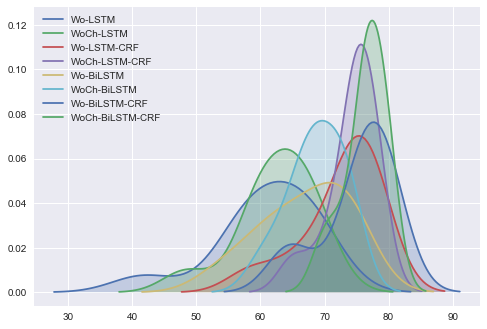

In [30]:
for nn in results_df_avg.index:
    sns.kdeplot(results_df_avg.transpose()[nn], shade=True)

# Statistical tests

In [31]:
results_df_avg

,fatText-2,Glove 42B,fastText,Amazon Reviews,Glove 6B 100,numberbatch,Glove 6B 50,Glove 840B,Glove 6B 200,Glove 6B 300,word2vec
Wo-LSTM,60.32,69.44,67.75,55.18,58.00,57.88,41.77,68.38,63.69,65.82,61.59
WoCh-LSTM,58.96,68.47,66.71,60.01,61.64,58.77,48.50,70.09,64.39,65.59,64.10
Wo-LSTM-CRF,74.66,77.39,77.95,65.15,73.26,69.19,58.48,77.72,76.94,74.51,72.88
WoCh-LSTM-CRF,75.93,78.36,77.53,70.04,72.97,74.15,65.12,77.66,75.00,75.15,75.44
Wo-BiLSTM,63.54,74.78,73.32,61.22,65.94,59.02,53.71,74.25,69.71,72.20,67.96
WoCh-BiLSTM,63.66,74.11,73.44,66.06,68.26,66.69,60.19,73.38,68.98,71.32,69.77
Wo-BiLSTM-CRF,77.05,81.08,79.34,64.89,76.44,73.03,64.39,79.99,78.22,77.28,74.93
WoCh-BiLSTM-CRF,77.04,79.21,79.73,69.65,75.88,75.09,72.05,80.13,77.77,77.40,76.38


In [21]:
results_df_avg = results_df_avg[EMBEDDINGS_SUBSET]

In [35]:
r_df = pandas2ri.py2ri(results_df_avg.transpose())
# r_df = pandas2ri.py2ri(results_df_avg)

In [36]:
scmamp.plotCD(r_df, alpha=0.05, cex=0.55)

TypeError: 'rpy2.rinterface.RNULLType' object is not iterable

R object with classes: ('list',) mapped to:
<ListVector - Python:0x7f00f92783c8 / R:0x556558dd2fa0>
[RNULLType, RNULLType, RNULLType]
  <no name>: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  <no name>: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  <no name>: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL

In [132]:
p_values = scmamp.friedmanAlignedRanksPost(r_df, use_rank = True)

In [133]:
p_values_bergmann_hommel_correction = scmamp.adjustBergmannHommel(p_values)

In [134]:
from itertools import product

In [135]:
nn_architectures = list(results_df_avg.transpose().columns)
nn_architectures_product = list(product(nn_architectures, nn_architectures))

In [136]:
nn_architectures_p_values = tuple(p_values_bergmann_hommel_correction)

In [137]:
p_values_with_architectures = list(zip(nn_architectures_product, nn_architectures_p_values))

In [138]:
p_values_df = {name : {} for name in nn_architectures}
for nns, pv in p_values_with_architectures:
    p_values_df[nns[0]].update({nns[1] : pv})


In [139]:
pd.DataFrame.from_dict(p_values_df).reindex(reindex_results_order)

,word lstm,char word lstm,word lstm crf,char word lstm crf,word bilstm,char word bilstm,word bilstm crf,char word bilstm crf
word lstm,NaN,1.000000,0.115203,0.004187,1.000000,0.366436,0.119260,0.000571
char word lstm,1.000000,NaN,0.467324,0.032723,1.000000,1.000000,0.467324,0.006553
word lstm crf,0.115203,0.467324,NaN,1.000000,0.571669,1.000000,1.000000,0.881192
char word lstm crf,0.004187,0.032723,1.000000,NaN,0.050420,1.000000,1.000000,1.000000
word bilstm,1.000000,1.000000,0.571669,0.050420,NaN,1.000000,0.597241,0.011781
char word bilstm,0.366436,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.467324
word bilstm crf,0.119260,0.467324,1.000000,1.000000,0.597241,1.000000,NaN,0.881192
char word bilstm crf,0.000571,0.006553,0.881192,1.000000,0.011781,0.467324,0.881192,NaN


In [30]:
# pd.DataFrame(p_values_with_architectures)

In [240]:
# friedman_test = scmamp.multipleComparisonTest(r_df, control = 'NoEmbedding', test='iman')
# friedman_p_value = friedman_test.rx2('p.value')[0]
# ranks, _, posthoc_pvals = scmamp.postHocTest(data=r_df, test="friedman", control = 'NoEmbedding', correct="holland", use_rank = True)

# Check coverage of words in embeddings for aspect datasets

In [75]:
corpus_words = statistics_dataset.get_unique_words_from_corpus()

Corpus iterator: 49475it [00:00, 857212.69it/s]
Corpus iterator: 53781it [00:00, 1063862.06it/s]
Corpus iterator: 12470it [00:00, 873477.69it/s]
Corpus iterator: 13257it [00:00, 613005.48it/s]


In [76]:
def load_word_embeddings(file_path):
    with open(file_path, encoding='utf-8') as fp:
        words = []
        try:
            for line in tqdm_notebook(fp, desc=file_path + ': embedding loading'):
                line_fields = line.split()
                if len(line_fields) < 5:
                    continue
                else:
                    if line[0] == ' ':
                        pass
                    else:
                        word = line_fields[0]
                        try:
                            pass
                        except:
                            continue
                        words.append(word)
        except UnicodeDecodeError:
            pass
    return set(words)

In [77]:
EMBEDDINGS_PATH = Path('/home/laugustyniak/data/embeddings/')

EMBEDDINGS = [
    'GoogleNews-vectors-negative300.txt',
    'glove.6B.50d.txt',
    'glove.6B.100d.txt',
    'glove.6B.200d.txt',
    'glove.6B.300d.txt',
    'glove.twitter.27B.200d.txt',
    'glove.42B.300d.txt',
    'glove.840B.300d.txt',
    'numberbatch-en.txt',
    'crawl-300d-2M.vec',
#     'wiki-news-300d-1M-subword.vec',
    'wiki-news-300d-1M.vec',
#     'bow2.words',
#     'bow2.contexts',
#     'bow5.words',
#     'bow5.contexts',
#     'deps.words',
#     'deps.contexts',
#     'sota-google.txt',
#     'sota-retrofit-600.txt',
#     'sota-sswe-50.txt',
#     'sota-wiki-600.txt',
    'sentic2vec.txt',
#     'lexvec.commoncrawl.ngramsubwords.300d.W.pos.vectors',
#     'lexvec.enwiki+newscrawl.300d.W.pos.vectors',    
]

In [78]:
def get_word_embeddings_vocabularies(word_embedding_names):
    return {
        word_embedding_name: load_word_embeddings((EMBEDDINGS_PATH / word_embedding_name).as_posix())
        for word_embedding_name 
        in tqdm_notebook(word_embedding_names)
    }
   
word_embedding_vocabulalaries = get_word_embeddings_vocabularies(EMBEDDINGS)

In [79]:
def get_datasets_coverage_with_word_embedding(corpus_words, word_embedding_vocabulalaries):
    word_embedding_coverage = {}
    for word_embedding_name, vocabulary in word_embedding_vocabulalaries.items():
        word_embedding_coverage[word_embedding_name] = {
            corpus_name: len(words.difference(vocabulary))/len(words)
            for corpus_name, words
            in corpus_words.items()
        }
    return word_embedding_coverage

In [80]:
{k: len(v) for k, v in  corpus_words.items()}

{'Restaurants_poria-train': 4619,
 'Laptops_poria-train': 4238,
 'Laptops_poria-test': 1922,
 'Restaurants_poria-test': 2270}

In [81]:
{word_embedding_name: len(vocabulary) for word_embedding_name, vocabulary in word_embedding_vocabulalaries.items()}

{'GoogleNews-vectors-negative300.txt': 2999993,
 'glove.6B.50d.txt': 400000,
 'glove.6B.100d.txt': 400000,
 'glove.6B.200d.txt': 400000,
 'glove.6B.300d.txt': 400000,
 'glove.twitter.27B.200d.txt': 1193515,
 'glove.42B.300d.txt': 1917494,
 'glove.840B.300d.txt': 2195884,
 'numberbatch-en.txt': 417194,
 'crawl-300d-2M.vec': 1999995,
 'wiki-news-300d-1M.vec': 999994,
 'sentic2vec.txt': 42007}

In [82]:
datasets_coverage_with_word_embedding = get_datasets_coverage_with_word_embedding(corpus_words, word_embedding_vocabulalaries)

In [83]:
lack_of_words_percentage = pd.DataFrame(datasets_coverage_with_word_embedding).round(4)*100

In [89]:
lack_of_words_percentage.to_excel((results_path / 'word-embeddings-coverage.xlsx').as_posix())
lack_of_words_percentage

,GoogleNews-vectors-negative300.txt,glove.6B.50d.txt,glove.6B.100d.txt,glove.6B.200d.txt,glove.6B.300d.txt,glove.twitter.27B.200d.txt,glove.42B.300d.txt,glove.840B.300d.txt,numberbatch-en.txt,crawl-300d-2M.vec,wiki-news-300d-1M.vec,sentic2vec.txt
Laptops_poria-test,8.38,4.27,4.27,4.27,4.27,8.17,1.77,2.24,9.83,2.39,4.68,17.17
Laptops_poria-train,11.14,9.18,9.18,9.18,9.18,11.70,3.40,4.20,14.06,4.32,6.91,18.55
Restaurants_poria-test,9.25,7.40,7.40,7.40,7.40,8.63,3.66,4.36,9.12,4.27,6.70,32.20
Restaurants_poria-train,12.73,10.78,10.78,10.78,10.78,11.99,5.00,6.11,13.70,5.98,9.33,34.38


In [ ]:
print(pd.DataFrame.from_dict(aspects, orient='index', columns=['Multi aspect ']).to_latex())

# Words/aspects appeared in test data but not in training 

In [ ]:
from collections import namedtuple

## Words statistics 

In [ ]:
WordsStats = namedtuple('WordsStats', 'coverage, all_unique_words')

In [ ]:
def words_coverage_stats(train_words: Set, test_words: Set):
    all_words = train_words.union(test_words)
    intersection_words = train_words - test_words
    return WordsStats(
        len(intersection_words)/len(all_words),
        len(all_words)
    )

In [ ]:
words_coverage_stats(corpus_words[statistics_dataset.dataset_restaurants_train], corpus_words[statistics_dataset.dataset_restaurants_test])

In [ ]:
words_coverage_stats(corpus_words[statistics_dataset.dataset_laptops_train], corpus_words[statistics_dataset.dataset_laptops_test])

## Aspect statistics  

In [50]:
aspects = statistics_dataset.get_uni_and_multigram_aspects_stats()

In [51]:
aspects

{}